<a href="https://colab.research.google.com/github/huilde/trabalho3unidade/blob/main/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  Analise dos voos aéreos no Brasil no ano de 2000

Esse trabalho apresenta uma análise de todos os voos aéreos realizados no Brasil, onde os nós representam os aeroportos e as arestas representam o voos de conexão existentes entre esses aéroportos.

In [ ]:

!pip install pyvis
!pip install streamlit
!pip install nxviz

from operator import itemgetter
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyvis.network import Network
import streamlit as st
import nxviz as nv

In [ ]:
def bad_line(x):
    print(x)
    return None
df = pd.read_csv('https://github.com/huilde/networkAnalisys/blob/d27ffc3d70fcdb9af0a7dd1640ab7b4ba5c9403c/dados.csv?raw=true',sep=';',skiprows=[0] ,encoding='unicode_escape', on_bad_lines=bad_line, engine='python',usecols = ["AEROPORTO_DE_ORIGEM_SIGLA", "AEROPORTO_DE_DESTINO_SIGLA","ANO"])


In [ ]:
df_between_airports = df.groupby(by=["AEROPORTO_DE_ORIGEM_SIGLA", "AEROPORTO_DE_DESTINO_SIGLA"]).count()
df_between_airports = df_between_airports['ANO'].rename('QUANTIDADE').reset_index()
df_between_airports = df_between_airports.sort_values(by="QUANTIDADE", ascending=False)

top = 4000
df_between_airports = df_between_airports.head(top)
df_between_airports['QUANTIDADE'] = df_between_airports['QUANTIDADE'] / 50


In [ ]:
node_sizes = df_between_airports.groupby('AEROPORTO_DE_ORIGEM_SIGLA').QUANTIDADE.agg(sum)
node_sizes

AEROPORTO_DE_ORIGEM_SIGLA
AONÂ 1,00    0.58
CYYZ         0.50
DTTA         0.40
EDDF         2.08
EDDT         0.08
             ... 
SWKN         0.68
SWNQ         0.26
SWPQ         0.06
TNCC         0.02
UUEE         0.40
Name: QUANTIDADE, Length: 175, dtype: float64

In [ ]:
net = Network(
    notebook = True,
    directed = True,            # directed graph
    bgcolor = "black",          # background color of graph
    font_color = "yellow",      # use yellow for node labels
    cdn_resources = 'in_line',  # make sure Jupyter notebook can display correctly
    height = "1000px",          # height of chart
    width = "100%",             # fill the entire width
    )

In [155]:
nodes = list(set([*df_between_airports['AEROPORTO_DE_ORIGEM_SIGLA'],
                  *df_between_airports['AEROPORTO_DE_DESTINO_SIGLA']
                 ]))

In [156]:
values = [node_sizes.get(node, 0)for node in nodes]
net.add_nodes(nodes, value = values)

edges = df_between_airports.values.tolist()
net.add_edges(edges)
net.show_buttons(filter_=['physics'])

net.show('flights.html')

flights.html


/Captura de Tela 2023-06-09 às 16.59.38.png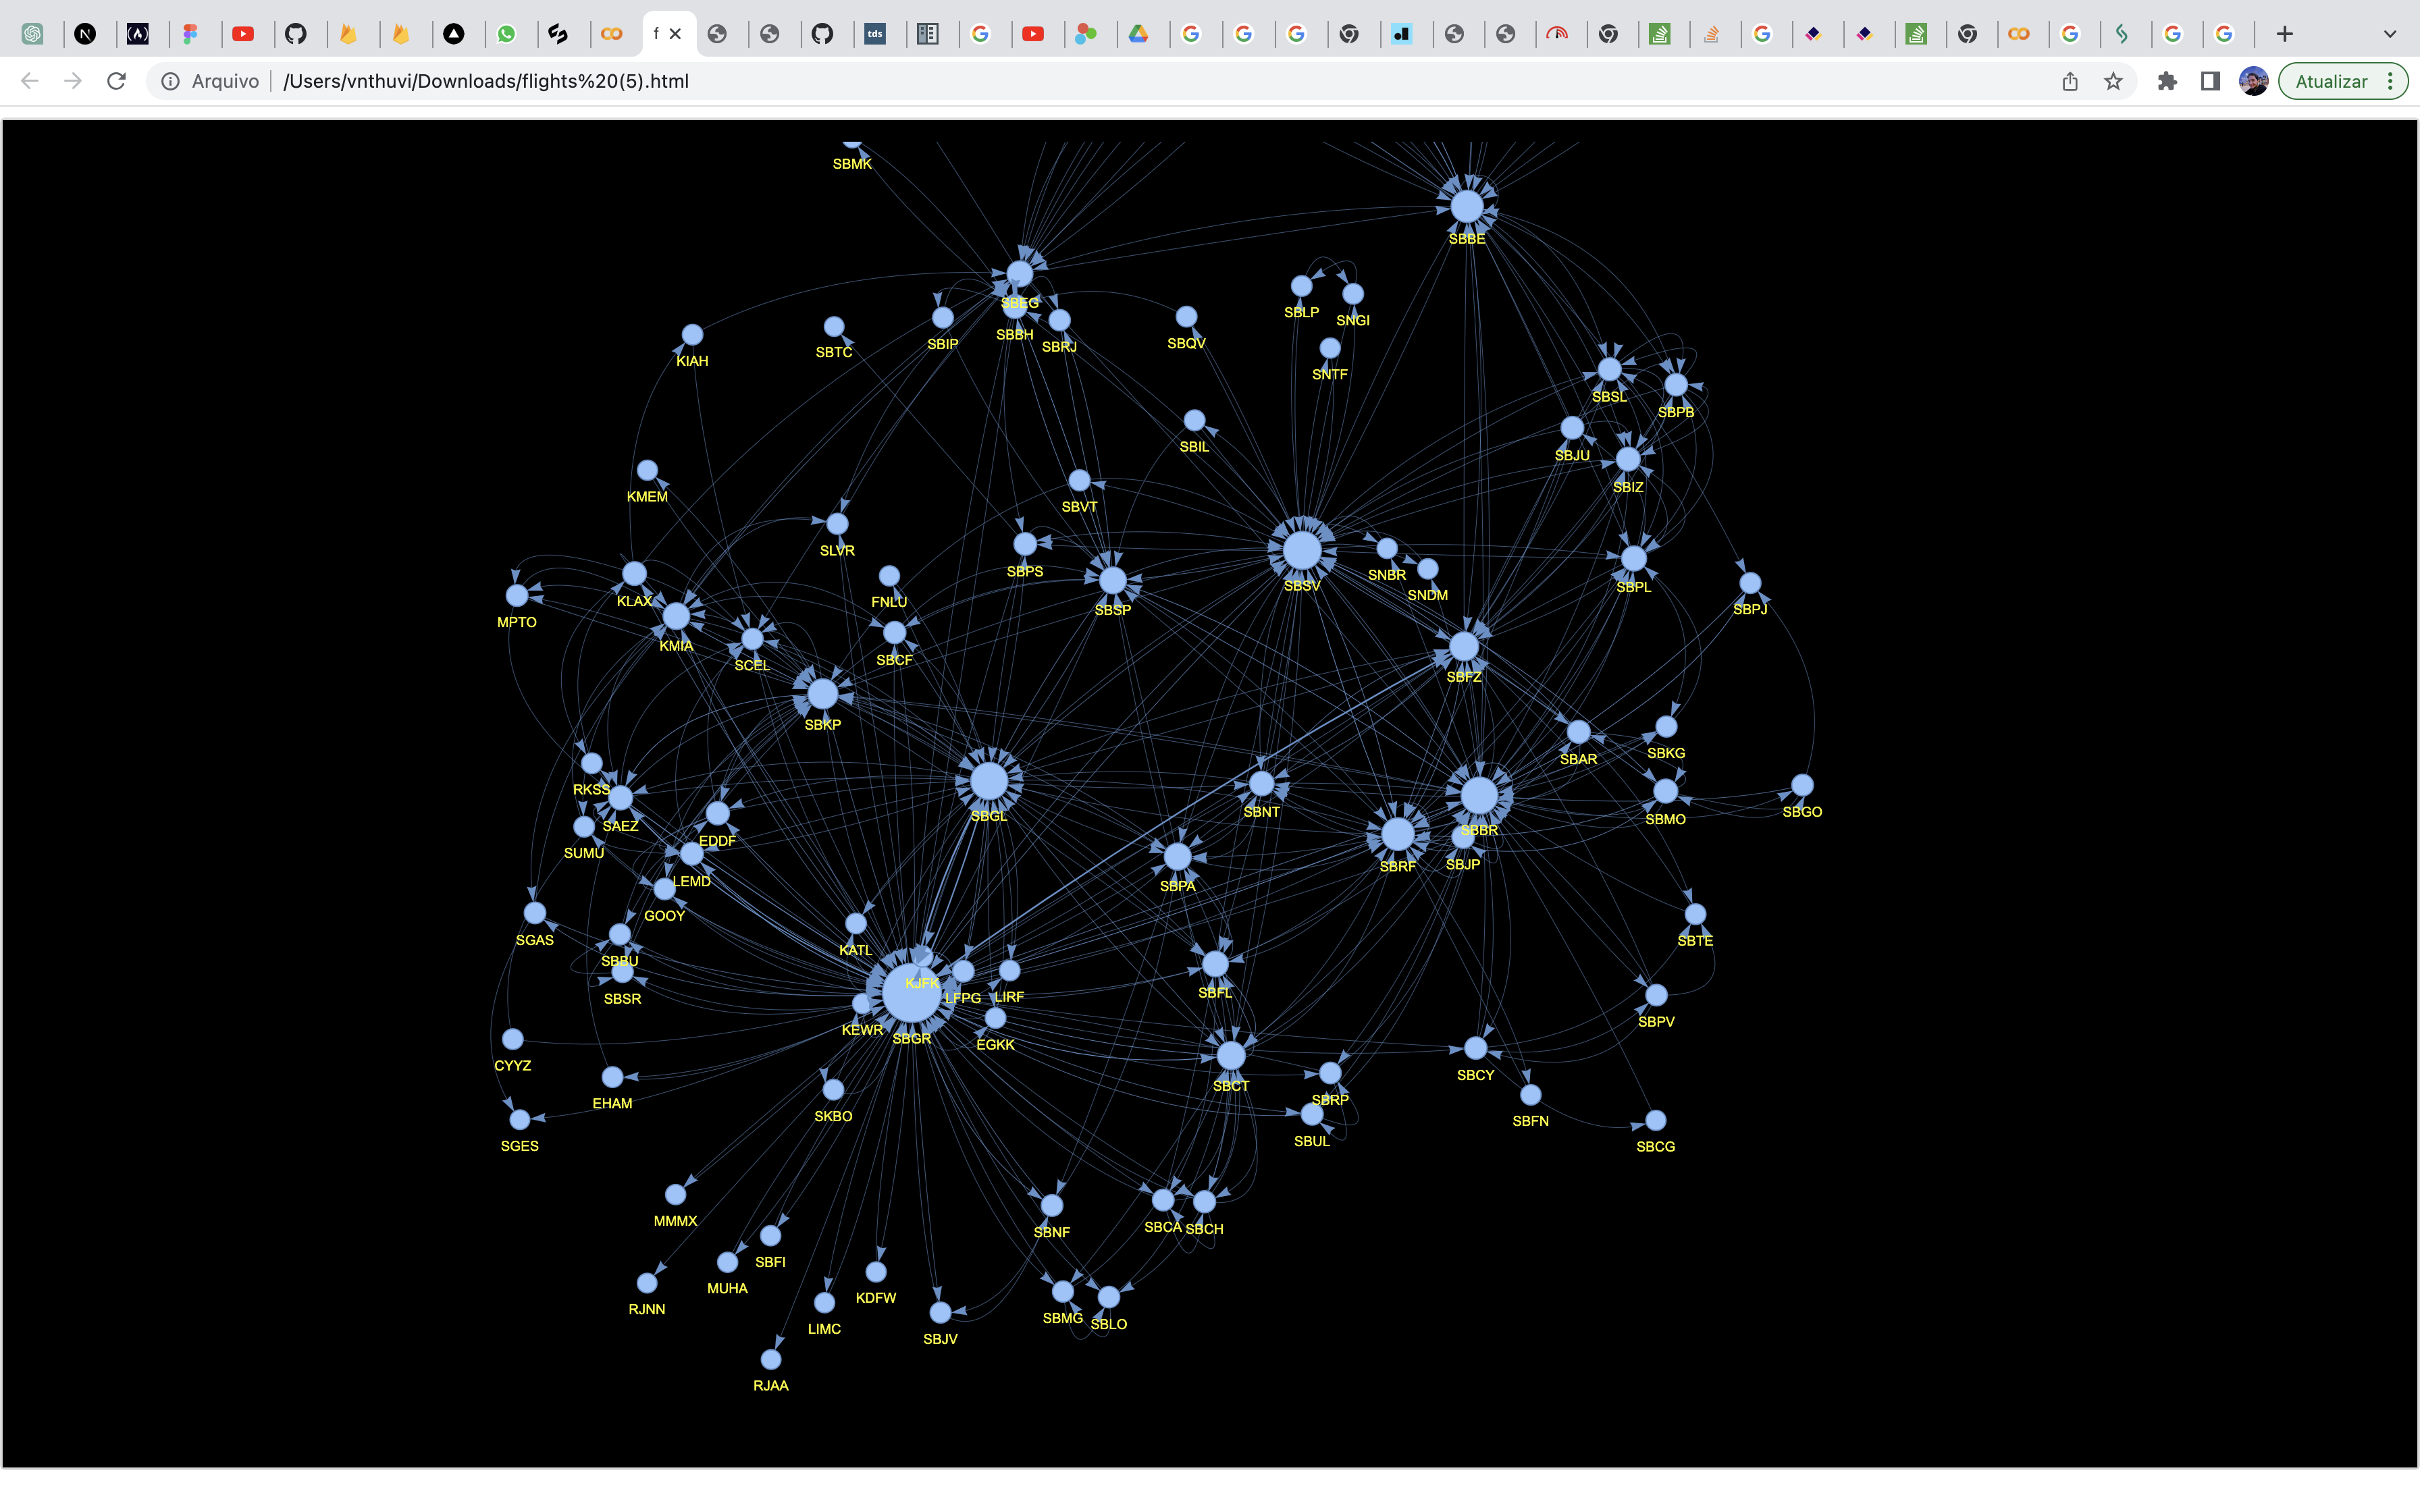

acima está o exemplo do grafo esperado, das conexões entre os aeroportos


# Agora iremos fazer os exercícios propostos:





# 1) matriz de adjascência:

<Axes: >

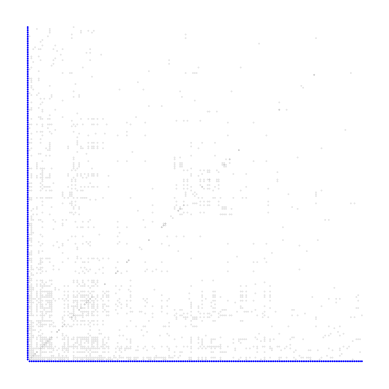

In [ ]:
G = nx.Graph()
new_edges = [array[:2] for array in edges]
G.add_edges_from(new_edges)
adj_matrix = nx.adjacency_matrix(G)

adj_array = adj_matrix.toarray()

nv.matrix(G)


# diâmetro e periferia da rede

In [ ]:
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])

periphery = []
for (i,j) in nx.shortest_path_length(G):
  if max(j.values()) == diameter:
    periphery.append(i)
periphery
print("Diâmetro da rede:", diameter)
print("Periferia da rede:", periphery)

Diâmetro da rede: 5
Periferia da rede: ['KMEM', 'SNTF', 'SNGI', 'SBLP', 'SBSM', 'SBUG', 'SSER', 'SSUW', 'SSPB', 'SSZR', 'SSHZ', 'SSLT', 'SCDA', 'SBCV', 'SNDM', 'SBPL', 'SNBR', 'SWKK', 'SBAA', 'SBVG', 'SNVR', 'SBCR', 'SVVA', 'SDCO', 'SSCK', 'SSEP', 'SSBG', 'SWGN', 'SNRU', 'SBBG', 'SAAR', 'MKJP', 'LSZH', 'KMAI', 'SNBG', 'SNGR', 'KSHR', 'KYIP', 'SBMD', 'SBHT', 'SBAQ', 'SBCM', 'SBPK']


# Histograma de distribuição empírica de grau

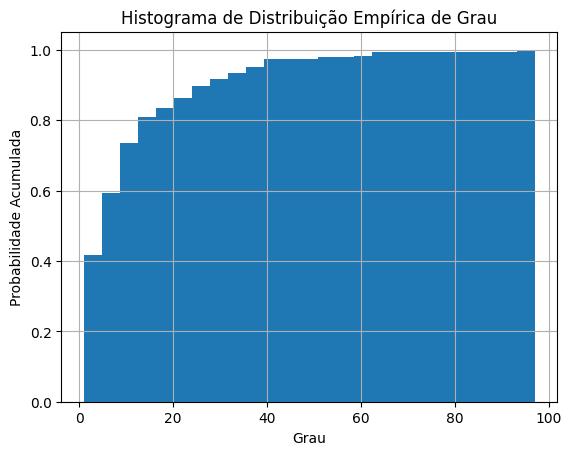

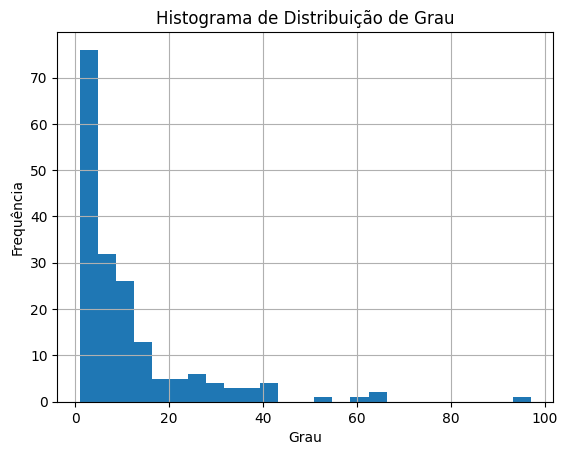

In [ ]:
degree_sequence = [d for n, d in G.degree()]

plt.hist(degree_sequence, bins='auto', density=True, cumulative=True)
plt.xlabel('Grau')
plt.ylabel('Probabilidade Acumulada')
plt.title('Histograma de Distribuição Empírica de Grau')
plt.grid(True)
plt.show()




degree_sequence2 = [d for n, d in G.degree()]

plt.hist(degree_sequence2, bins='auto', density=False)
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição de Grau')
plt.grid(True)
plt.show()

# Coeficiente de clustering local


In [ ]:
nodes = ["SBGR", "RJAA", "SBSV"]
# RJAA é um nó periférico, enquanto os outros dois são nós mais centrais
clustering_coefficients = nx.clustering(G, nodes)

for node, cc in clustering_coefficients.items():
    print(f"Coeficiente de clustering local do nó {node}: {cc}")

Coeficiente de clustering local do nó SBGR: 0.1251959686450168
Coeficiente de clustering local do nó RJAA: 1.0
Coeficiente de clustering local do nó SBSV: 0.4012820512820513


O coeficiente de clustering local de um nó é uma medida que indica a probabilidade de que os vizinhos desse nó estejam conectados uns aos outros. Essa medida avalia o quão denso é o grupo de vizinhos de um determinado nó em uma rede.

Coeficiente de clustering local do nó SBGR: 0.07138535995160314
Um coeficiente de clustering local de 0.07138535995160314 para o nó SBGR indica que há uma probabilidade relativamente baixa de que os vizinhos do aeroporto SBGR (Aeroporto de Guarulhos, em São Paulo) estejam interconectados uns aos outros. Isso sugere que os voos saindo ou chegando em SBGR não formam um grupo denso de conexões entre os outros aeroportos vizinhos.

Coeficiente de clustering local do nó RJAA: 0
Um coeficiente de clustering local de 0 para o nó RJAA indica que os vizinhos do Aeroporto de Narita (RJAA) em Tóquio não estão interconectados entre si. Isso significa que os voos saindo ou chegando em RJAA não formam um grupo denso de conexões com os outros aeroportos vizinhos.

Coeficiente de clustering local do nó SBSV: 0.3333333333333333
Um coeficiente de clustering local de 0.3333333333333333 para o nó SBSV (Aeroporto de Salvador, na Bahia) indica que há uma probabilidade relativamente alta de que os vizinhos de SBSV estejam interconectados uns aos outros. Isso sugere que os voos saindo ou chegando em SBSV formam um grupo mais denso de conexões entre os outros aeroportos vizinhos.

Esses coeficientes de clustering local indicam a tendência de formação de grupos densos de conexões entre os vizinhos dos nós específicos na rede de voos entre aeroportos brasileiros. É importante considerar esses valores em relação a outros nós e analisar a estrutura geral da rede para obter uma compreensão completa das interconexões entre os aeroportos.

# Coeficiente de clustering global





In [ ]:
clustering_coefficient = nx.average_clustering(G)

# Imprimir o coeficiente de clustering global
print(f"Coeficiente de clustering global: {clustering_coefficient}")

Coeficiente de clustering global: 0.6721218658431255


indica que os nós do grafo estão relativamente bem interconectados e formam grupos densos em comparação com um grafo completamente aleatório. Isso significa que, em geral, os aeroportos brasileiros têm uma interconectividade significativa, onde os voos tendem a formar grupos densos de conexões entre diferentes aeroportos. Essa estrutura de conexões densas sugere que existe uma probabilidade relativamente alta de que um voo entre dois aeroportos brasileiros tenha uma rota alternativa através de outros aeroportos próximos.

# Componentes Conectados Fortemente

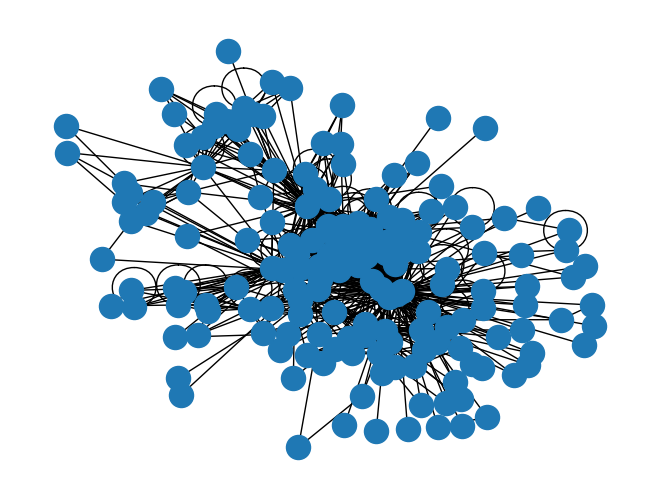

In [ ]:
G2 = nx.DiGraph()
G2.add_edges_from(new_edges)
scc = nx.strongly_connected_components(G2)

subgraph = G.subgraph(sorted(scc, key=lambda n : len(n), reverse=True)[0])
nx.draw(subgraph)

# Imprimir os componentes conectados fortemente
for component in scc:
    print("Componente:", component)

In [ ]:
nx.write_graphml(G, "atividade4000.graphml")

# Componentes concectados fracamente

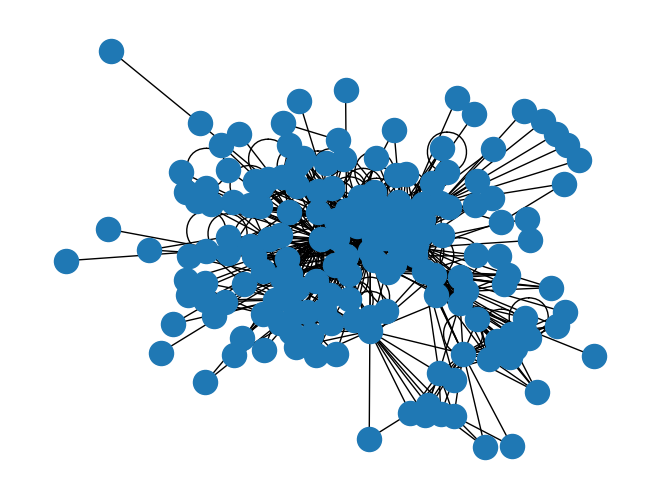

Componente: {'SDUB', 'SBGL', 'SBME', 'SBCV', 'LSZH', 'KATL', 'KDFW', 'SBHT', 'MDSD', 'SNTF', 'SNRU', 'SBUG', 'KIAH', 'GOOY', 'SBML', 'SSHZ', 'SBRJ', 'SBSP', 'KJFK', 'SBTU', 'SBBR', 'LEAS', 'SBSV', 'EDDF', 'RJNN', 'EDDT', 'SBSL', 'SBAQ', 'SSUW', 'SBCG', 'SACO', 'LEMD', 'EGKK', 'SBAA', 'SDCO', 'SBPL', 'SNTI', 'SBBI', 'SSCK', 'KMCO', 'LIMC', 'SNFE', 'SBTC', 'SBAR', 'SBGO', 'SBBU', 'SOCA', 'SBPS', 'SBSR', 'SBEG', 'SBAU', 'EHAM', 'SPIM', 'SNBG', 'SDAG', 'SBUL', 'AONÂ\xa01,00', 'SBDN', 'KSAT', 'SBIH', 'SBLP', 'SBMN', 'KSHR', 'SEGU', 'SBBE', 'KMIA', 'SSER', 'SBBH', 'SBTE', 'SNBR', 'SBLO', 'SBNF', 'TNCC', 'SBBT', 'SWJI', 'SBFI', 'SDVG', 'SBMA', 'EDDV', 'MMMX', 'SBCY', 'SBCT', 'MYNN', 'SBIZ', 'SDAN', 'SNOX', 'SUMU', 'RKSS', 'SWNQ', 'SBMC', 'SBPN', 'SWPQ', 'LFPG', 'SBVT', 'SBCF', 'SBIL', 'SBSM', 'MUHA', 'SBCR', 'SBMO', 'SBFZ', 'LIRF', 'KLAX', 'MKJP', 'SBBV', 'SBMD', 'SCDA', 'SBPJ', 'SBCX', 'SWKK', 'SBFL', 'SSTD', 'SBRP', 'SWGI', 'SBBG', 'SBTD', 'UUEE', 'SBJP', 'SNGR', 'SBUR', 'SSZR', 'SNDC', 'SS

In [ ]:
wcc = list(nx.weakly_connected_components(G2))
nx.draw(G.subgraph(wcc[0]))
# Imprimir os componentes conectados fracamente

plt.show()
for component in wcc:
    print("Componente:", component)

In [ ]:
def print_graph(G, color):
  fig, ax = plt.subplots(1,1,figsize=(10,8))

  pos = nx.spring_layout(G)

  nx.draw_networkx_edges(G,
                        pos=pos,
                        alpha=0.4, ax=ax)

  nodes = nx.draw_networkx_nodes(G,
                  pos=pos,
                  node_color=color,
                  cmap=plt.cm.jet,
                  ax=ax)

  plt.axis("off")
  plt.colorbar(nodes)
  plt.show()

# Degree centrality.


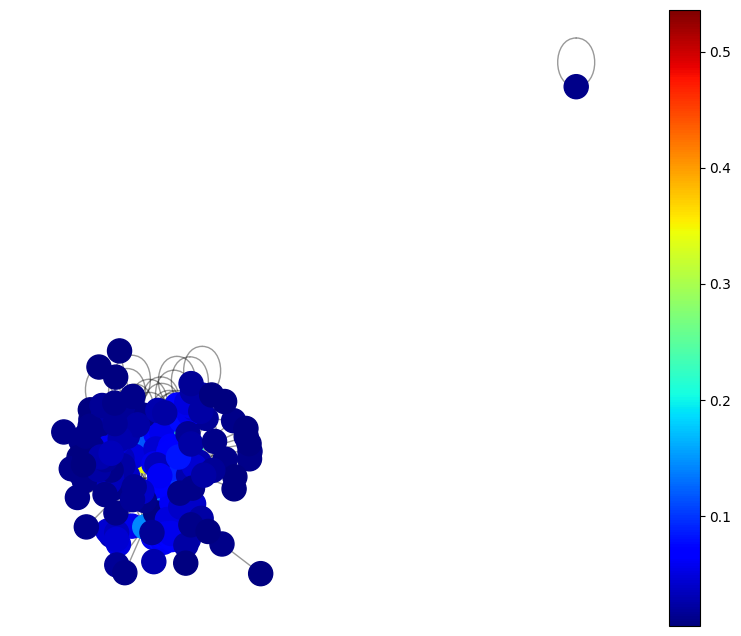

In [ ]:
degree_centrality = dict(nx.degree_centrality(G))
sorted(degree_centrality.items(), key=lambda items : items[1], reverse=True)
# Imprimir o degree centrality de cada nó
print_graph(G, list(degree_centrality.values()))


# Closeness centrality


Nó: SBGR Closeness Centrality: 0.6654480478136746
Nó: SBBR Closeness Centrality: 0.5869033602028801
Nó: SBGL Closeness Centrality: 0.5811867690320729
Nó: SBKP Closeness Centrality: 0.579305905701872
Nó: SBSP Closeness Centrality: 0.5559177790741566
Nó: SBFZ Closeness Centrality: 0.531173664278571
Nó: SBCT Closeness Centrality: 0.5264868378290543
Nó: SBPA Closeness Centrality: 0.5264868378290543
Nó: SBGO Closeness Centrality: 0.5264868378290543
Nó: SBSV Closeness Centrality: 0.5249428881580013
Nó: SBFL Closeness Centrality: 0.5203648978542978
Nó: SBRF Closeness Centrality: 0.515866065884376
Nó: SBNT Closeness Centrality: 0.515866065884376
Nó: SBRP Closeness Centrality: 0.5143836921318347
Nó: SBCF Closeness Centrality: 0.509987250318742
Nó: SBMO Closeness Centrality: 0.509987250318742
Nó: SBEG Closeness Centrality: 0.5042409151038829
Nó: SBPS Closeness Centrality: 0.5042409151038829
Nó: SBSR Closeness Centrality: 0.49312816766357703
Nó: SBJV Closeness Centrality: 0.49042609551199573
Nó: 

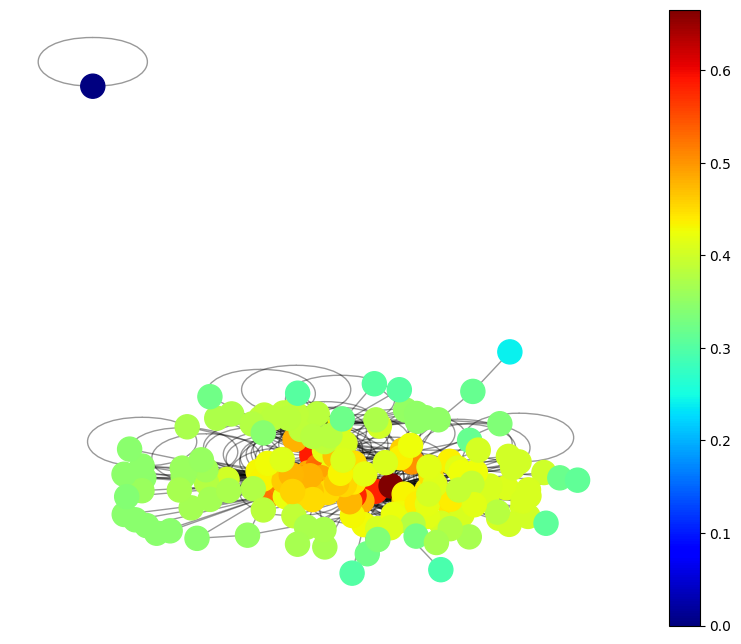

In [ ]:
eness_centrality = dict(nx.closeness_centrality(G))
sorted(closeness_centrality.items(), key=lambda items : items[1], reverse=True)


# Imprimir o closeness centrality de cada nó
for node, centrality in sorted(closeness_centrality.items(), key=lambda items : items[1], reverse=True):
    print("Nó:", node, "Closeness Centrality:", centrality)

print_graph(G, list(closeness_centrality.values()))

# Betweenness centrality

Nó: SBGR Betweenness Centrality: 0.31485301469820165
Nó: SBBR Betweenness Centrality: 0.1652599255878871
Nó: SBGL Betweenness Centrality: 0.11461753017290292
Nó: SBKP Betweenness Centrality: 0.10114357717581203
Nó: SBSV Betweenness Centrality: 0.07932933241378036
Nó: SBEG Betweenness Centrality: 0.07551648297930151
Nó: SBPA Betweenness Centrality: 0.0703665827485714
Nó: SBSP Betweenness Centrality: 0.06673539738916921
Nó: SBBE Betweenness Centrality: 0.04128517008974383
Nó: SBPJ Betweenness Centrality: 0.03388214988949864
Nó: SBCT Betweenness Centrality: 0.03302641062645022
Nó: SAEZ Betweenness Centrality: 0.03250403721017738
Nó: SBFL Betweenness Centrality: 0.030849370513203002
Nó: LFPG Betweenness Centrality: 0.026856116978699364
Nó: KMIA Betweenness Centrality: 0.025067830214737328
Nó: SBFZ Betweenness Centrality: 0.0239112865030755
Nó: SBGO Betweenness Centrality: 0.01905856339687929
Nó: SBRF Betweenness Centrality: 0.018406389506693054
Nó: SBVT Betweenness Centrality: 0.0118514798

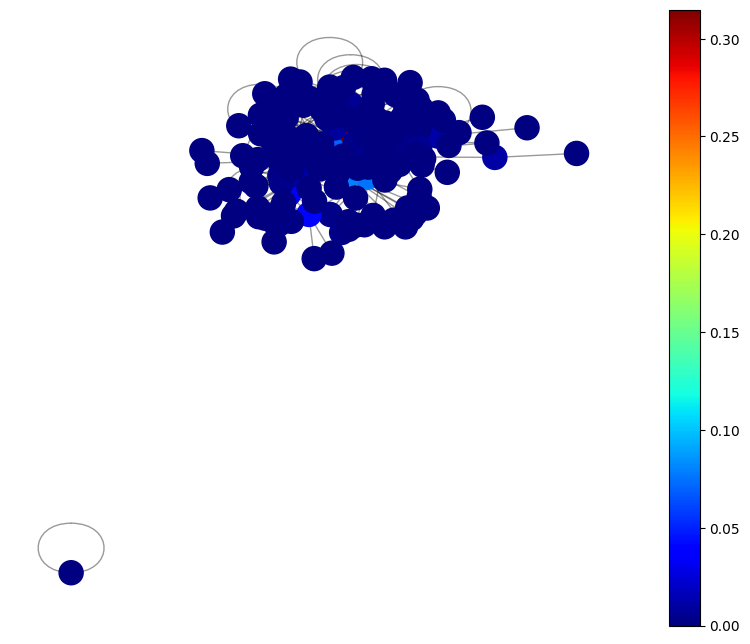

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

# Imprimir o betweenness centrality de cada nó
for node, centrality in sorted(betweenness_centrality.items(), key=lambda items : items[1], reverse=True):
    print("Nó:", node, "Betweenness Centrality:", centrality)

print_graph(G, list(betweenness_centrality.values()))

 Eigenvector centrality.

Nó: SBGR Eigenvector Centrality: 0.2692965030318341
Nó: SBKP Eigenvector Centrality: 0.2266095334222804
Nó: SBBR Eigenvector Centrality: 0.22268316071518568
Nó: SBSP Eigenvector Centrality: 0.22058808310639508
Nó: SBGL Eigenvector Centrality: 0.21256809881417385
Nó: SBFZ Eigenvector Centrality: 0.1980295488048134
Nó: SBRF Eigenvector Centrality: 0.19071766133760878
Nó: SBRP Eigenvector Centrality: 0.19017173046301375
Nó: SBCT Eigenvector Centrality: 0.18934388532138305
Nó: SBSV Eigenvector Centrality: 0.18501764167640805
Nó: SBNT Eigenvector Centrality: 0.1846447371832113
Nó: SBMO Eigenvector Centrality: 0.18237675460863054
Nó: SBFL Eigenvector Centrality: 0.17580761801981956
Nó: SBCF Eigenvector Centrality: 0.17437510750282523
Nó: SBPA Eigenvector Centrality: 0.17008349861610247
Nó: SBGO Eigenvector Centrality: 0.15803870274402995
Nó: SBSR Eigenvector Centrality: 0.15502141018876536
Nó: SBUL Eigenvector Centrality: 0.1531039340024887
Nó: SBPS Eigenvector Centrality: 0.1518152515142874

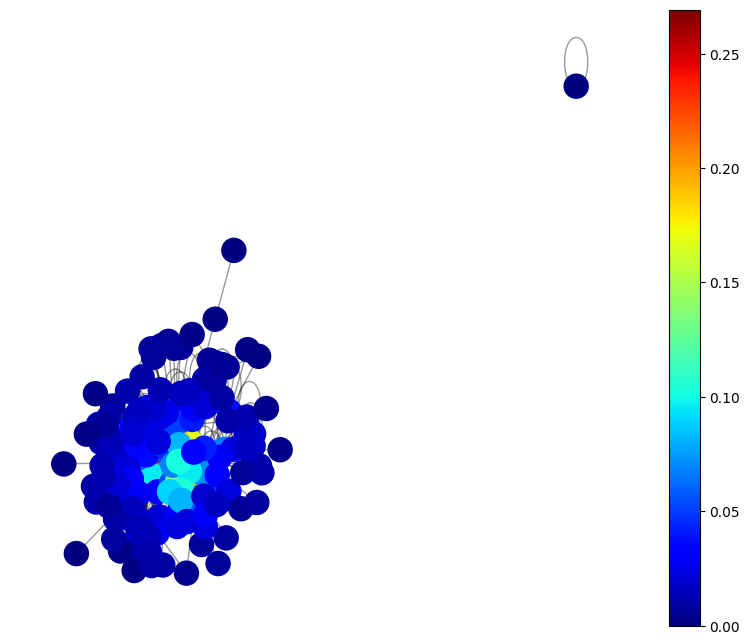

In [ ]:
eigenvector_centrality = dict(nx.eigenvector_centrality(G))

for node, centrality in sorted(eigenvector_centrality.items(), key=lambda items : items[1], reverse=True):
    print("Nó:", node, "Eigenvector Centrality:", centrality)

print_graph(G, list(eigenvector_centrality.values()))

# Assortatividade geral da rede.

In [ ]:
num_nodes = len(G.nodes)
num_edges = len(G.edges)

density = num_edges / (num_nodes * (num_nodes - 1))
print(density)

0.030629591403072066


Isso significa que há poucas conexões em relação ao número total de pares possíveis de conexões entre os aeroportos.

Em outras palavras, essa densidade indica que, em média, apenas cerca de 3% das possíveis conexões entre os aeroportos estão realmente presentes na rede.

Uma densidade baixa pode refletir várias situações no contexto dos voos entre aeroportos brasileiros. Pode indicar que nem todos os aeroportos têm voos diretos entre si ou que existem muitos aeroportos com poucas rotas disponíveis. Também pode indicar que certas regiões têm menos opções de conexões aéreas ou que a malha de transporte aéreo no Brasil é menos densa em geral

In [ ]:
assortativity = nx.degree_assortativity_coefficient(G)

print("Assortatividade Geral:", assortativity)

Assortatividade Geral: -0.2955268892556085


A assortatividade geral, também conhecida como coeficiente de assortatividade, é uma medida que indica a tendência de nós semelhantes se conectarem entre si em uma rede. O valor da assortatividade geral varia de -1 a 1.

Uma assortatividade geral de -0.2955268892556085 indica que a rede possui uma tendência de conexões entre nós que são diferentes em algumas características específicas. Nesse caso, a rede mostra uma tendência de nós com características diferentes se conectarem entre si em vez de se conectarem a nós com características semelhantes.

Por exemplo, em um contexto de rede de voos entre aeroportos brasileiros, uma assortatividade geral negativa poderia indicar que a conexão de voos ocorre mais frequentemente entre aeroportos com diferentes tamanhos, densidades populacionais, ou que estão localizados em diferentes regiões geográficas. Isso significa que a rede não mostra uma tendência forte de conexões entre aeroportos semelhantes em relação a essas características.
